## CNN + Transfer Learning 실습

In [4]:
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub

In [ ]:
pip install tensorflow_hub

### 1-1 Tensorflow Hub에서 MobileNet 불러오기

In [5]:
url = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4'

model = tf.keras.Sequential([
    hub.KerasLayer(url, input_shape=(224, 224, 3), trainable=False)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
Total params: 5,432,713
Trainable params: 0
Non-trainable params: 5,432,713
_________________________________________________________________


### 데이터 불러온 후 저장하기

In [6]:
import pathlib

img_url = '/home/miruware/kubwa/Lecture/data/datasets'

#data_url = tf.keras.utils.get_file('imagenetV2', 
                                   #'https://imagenetv2public.s3-us-west-2.amazonaws.com/imagenetv2-topimages.tar.gz',
                                   #cache_dir=img_url, extract=True)

In [7]:
import pathlib

img_url = '/home/miruware/kubwa/Lecture/data/datasets'
data_root = pathlib.Path(img_url + '/imagenetV2-topimages')

In [8]:
print(data_root)

/home/miruware/kubwa/Lecture/data/datasets/imagenetV2-topimages


In [9]:
for idx, item in enumerate(data_root.iterdir()):
    print(item)
    if idx == 9:
        break

/home/miruware/kubwa/Lecture/data/datasets/imagenetV2-topimages/489
/home/miruware/kubwa/Lecture/data/datasets/imagenetV2-topimages/525
/home/miruware/kubwa/Lecture/data/datasets/imagenetV2-topimages/573
/home/miruware/kubwa/Lecture/data/datasets/imagenetV2-topimages/677
/home/miruware/kubwa/Lecture/data/datasets/imagenetV2-topimages/708
/home/miruware/kubwa/Lecture/data/datasets/imagenetV2-topimages/706
/home/miruware/kubwa/Lecture/data/datasets/imagenetV2-topimages/526
/home/miruware/kubwa/Lecture/data/datasets/imagenetV2-topimages/760
/home/miruware/kubwa/Lecture/data/datasets/imagenetV2-topimages/572
/home/miruware/kubwa/Lecture/data/datasets/imagenetV2-topimages/5


In [10]:
# ImagneNet에서 Label을 불러와서 처리

In [11]:
label_file = tf.keras.utils.get_file('label', 
                                     'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
lable_text = None

with open(label_file, 'r') as f:
    label_text = f.read().split('\n')[:-1]
    
print(len(label_text))
print(label_text[:5])
print(label_text[-5:])

1001
['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']
['earthstar', 'hen-of-the-woods', 'bolete', 'ear', 'toilet tissue']


### 데이터 확인

In [12]:
import PIL.Image as Image
import matplotlib.pyplot as plt
import random
import glob

all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]

image_count = len(all_image_paths)
print('image_count:', image_count)

image_count: 10002


In [13]:
all_image_paths[:10]

['/home/miruware/kubwa/Lecture/data/datasets/imagenetV2-topimages/489/6.jpeg',
 '/home/miruware/kubwa/Lecture/data/datasets/imagenetV2-topimages/489/1.jpeg',
 '/home/miruware/kubwa/Lecture/data/datasets/imagenetV2-topimages/489/8.jpeg',
 '/home/miruware/kubwa/Lecture/data/datasets/imagenetV2-topimages/489/3.jpeg',
 '/home/miruware/kubwa/Lecture/data/datasets/imagenetV2-topimages/489/5.jpeg',
 '/home/miruware/kubwa/Lecture/data/datasets/imagenetV2-topimages/489/0.jpeg',
 '/home/miruware/kubwa/Lecture/data/datasets/imagenetV2-topimages/489/7.jpeg',
 '/home/miruware/kubwa/Lecture/data/datasets/imagenetV2-topimages/489/4.jpeg',
 '/home/miruware/kubwa/Lecture/data/datasets/imagenetV2-topimages/489/9.jpeg',
 '/home/miruware/kubwa/Lecture/data/datasets/imagenetV2-topimages/489/2.jpeg']

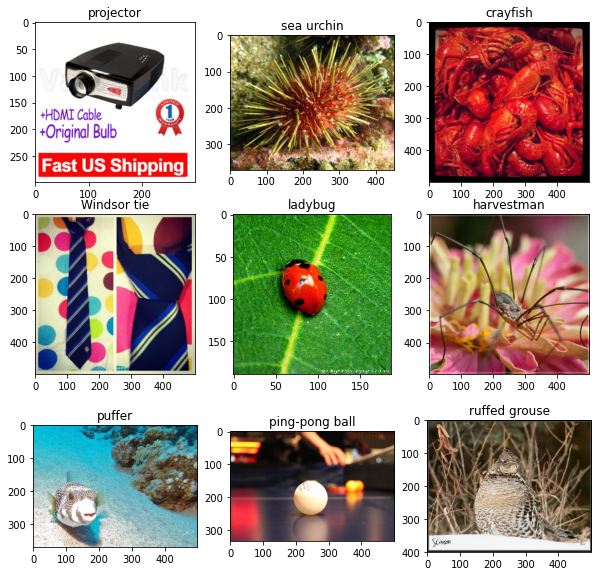

In [14]:
plt.figure(figsize=(10, 10))
for i in range(9):
    image_path = random.choice(all_image_paths)
    plt.subplot(3, 3, i+1)
    plt.imshow(plt.imread(image_path))
    idx = int(image_path.split('/')[-2]) + 1
    plt.title(label_text[idx])
    
plt.show()

### Inference 성능 확인

In [15]:
import cv2

top_1 = 0
top_5 = 0
for img_path in all_image_paths[:100]:
    img = cv2.imread(img_path)
    img = cv2.resize(img, dsize=(224, 224))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    top_5_predict = model.predict(img)[0].argsort()[::-1][:5]
    idx = int(img_path.split('/')[-2])+1
    if idx in top_5_predict:
        top_5 += 1
        if top_5_predict[0] == idx:
            top_1 += 1

print('Top-5 correctness:', top_5 / len(all_image_paths) * 100, '%')
print('Top-1 correctness:', top_1 / len(all_image_paths) * 100, '%')

Top-5 correctness: 0.8398320335932814 %
Top-1 correctness: 0.5298940211957609 %


### 캐글 breed-identification 다운로드 받기
https://www.kaggle.com/c/dog-breed-identification/data

#### Labeling 확인

In [16]:
import pandas as pd

label_text = pd.read_csv('labels.csv')
label_text.head(3)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese


In [17]:
label_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [20]:
label_text['breed'].nunique()

120

#### 데이터 이미지 확인

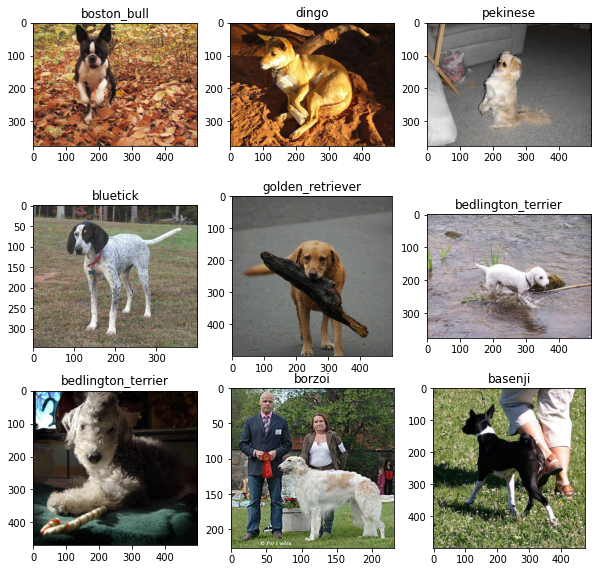

In [23]:
import PIL.Image as Image
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for c in range(9):
    image_id = label_text.loc[c, 'id']
    plt.subplot(3, 3, c+1)
    plt.imshow(plt.imread('train/' + image_id + '.jpg'))
    plt.title(label_text.loc[c, 'breed'])
plt.show()

#### MobileNet V2로 Transfer Learning

In [24]:
from tensorflow.keras.applications import MobileNetV2

mobilev2 = MobileNetV2()

14540800/14536120 [==============================] - 1s 0us/step


In [35]:
# MobileNet V2 가중치 초기화


for layer in mobilev2.layers[:-1]:
    layer.trainable = True
    
for layer in mobilev2.layers[:-1]:
    if 'kernel' in layer.__dict__:
        kernel_shape= np.array(layer.get_weights()).shape
        layer.set_weights(tf.random.normal(kernel_shape, 0, 1))

In [40]:
# train 데이터 준비

import cv2

X_train=[]
for i in range(len(label_text)):
    img = cv2.imread('train/' + label_text['id'][i] + '.jpg')
    img = cv2.resize(img, dsize=(224, 224))
    img = img / 255.0
    X_train.append(img)
    
X_train = np.array(X_train)
print(X_train.shape)
print(X_train.size * X_train.itemsize, 'bytes')

(10222, 224, 224, 3)
12309577728 bytes


#### Keras.preprocessing.image 

In [ ]:
import os
import shutil
#os.mkdir('/train_sub')
#os.mkdir('/content/train_sb')

for i in range(len(label_text)):
    if os.path.exists('/train_sub/' + label_text.loc[i]['breed'])==False:
        os.mkdir('/train_sub/' + label_text.loc[i]['breed'])
    shutil.copy('/train/' + label_text.loc[i]['id']+'.jpg', 
                '/train_sub/' + label_text.loc[i]['breed'])

In [ ]:
import os
import shutil
#os.mkdir('/train_sub')
#os.mkdir('/content/train_sb')


for i in range(len(label_text)):
if os.path.exists('/train_sub/' + label_text.loc[i]['breed'])==False:
    os.mkdir('/train_sub/' + label_text.loc[i]['breed'])
    shutil.copy('/train/' + label_text.loc[i]['id']+'.jpg', 
            '/train_sub/' + label_text.loc[i]['breed'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input

train_datagen = ImageDataGenerator(rescale=1./225,
                                   validation_split=0.25)
valid_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.25)

train_gen = train_datagen.flow_from_directory(directory='./train_sub/', 
                                              subset='training',
                                              batch_size=32,
                                              seed=1,
                                              shuffle=True,
                                              class_mode='categorical',
                                              target_size=(224, 224))

valid_gen = valid_datagen.flow_from_directory(directory='./train_sub/', 
                                              subset='validation',
                                              batch_size=32,
                                              seed=1,
                                              shuffle=True,
                                              class_mode='categorical',
                                              target_size=(224, 224))

In [70]:
# y_train 만들기
label_list = label_text['breed'].unique().tolist()
y_train = [label_list.index(breed) for breed in label_text['breed']]

In [72]:
y_train = np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(10222, 224, 224, 3)
(10222,)


### 모델 만들기

In [73]:
mobilev2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [77]:
x = mobilev2.layers[-2].output
predictions = tf.keras.layers.Dense(120, activation='softmax')(x)

model = tf.keras.Model(inputs=mobilev2.input,
                       outputs=predictions)

In [78]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [ ]:
history = model.fit(X_train, y_train, 
                    epochs=10,
                    validation_split=0.3,
                    batch_size=128)

### 학습 결과 확인

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 0.1)
plt.legend()

plt.show()